In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('housing.data', header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df[['RM']].values # 房間數:解釋變量
y = df['MEDV'].values # 房價: 預測變量
sc_x = StandardScaler() # 標準化後收斂更快
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() # 因為np.newaxis會儲存在二維陣列中，所以用flatten轉回一維

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('housing.data', header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df[['RM']].values # 房間數:解釋變量
y = df['MEDV'].values # 房價: 預測變量
sc_x = StandardScaler() # 標準化後收斂更快
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() # 因為np.newaxis會儲存在二維陣列中，所以用flatten轉回一維

離群值很容易對整個回歸模型造成巨大的影響。但如果我們貿然移除離群值可能會丟失某些重要的資訊。但是舉我們的房價資料集來說，並不是每個人都是炒房專家，所以要挑選出不合理的離群值並不容易。這時就要使用RANSAC(random sample consensus，隨機取樣共識)演算法來作回歸。其步驟如下:

1. 隨機挑選不定數量的樣本，作為群內值(離群值的相反)來fitting
2. 使用剩餘的數據測試該模型，若數據落在我們定義的容許範圍內，就加入群內值
3. 用新的群內值再fitting一次
4. 估計誤差
5. 若誤差<自己定義的容許值或迭代次數已經達到上限就停止，否則回到第一步

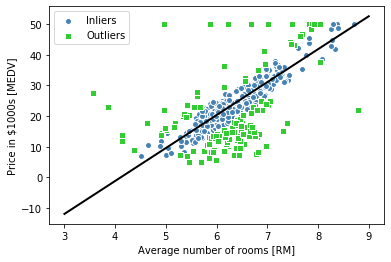

In [3]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # 最大迭代次數
                         min_samples=50, # 第一步取的個數
                         loss='absolute_loss', 
                         residual_threshold=5.0, # 樣本點與回歸垂直距離<5就列入群內值 
                         random_state=0)


ransac.fit(X, y)

# 找出群內值與離群值
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# 繪製散佈圖與回歸直線圖
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()